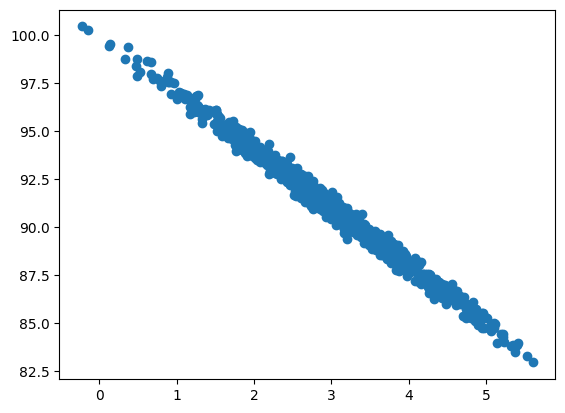

In [1]:
"""构造模拟数据
构造随机的模拟数据，通过散点图来观察理解数据。
"""
import numpy
from pylab import *  # pylab来自matplotlib

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3
scatter(pageSpeeds, purchaseAmount)


In [2]:
"""使用线性回归拟合曲线
获取斜率、截距、r方等值。

r方（或判定系数）：用来评估直线对数据的拟合效果，值在0和1之间，0表示拟合效果槽糕，1表示拟合效果很好。
"""
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

In [3]:
"""
计算r方
"""
r_value ** 2


0.990122193808381

In [4]:
"""根据训练出来的斜率和截距，构建预测函数
"""
def predict(page_speed: float):
    return slope * page_speed + intercept


predict(1)


97.03891822987141

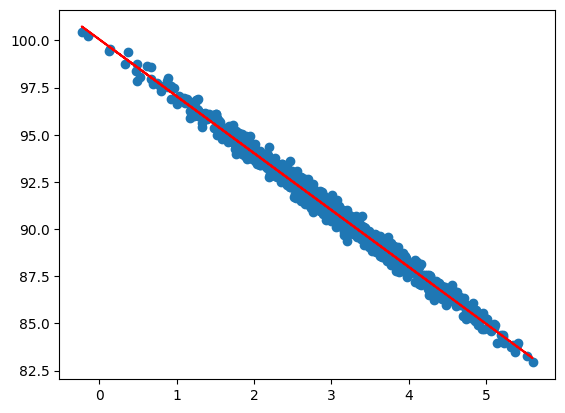

In [5]:
"""画出数据和拟合曲线，观察拟合效果
"""
import matplotlib.pyplot as plt

fitLine = predict(pageSpeeds)
plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')  # 把训练出来的函数用线画出来
plt.show()


# 探索

## 普通最小二乘法

在《Python数据科学与机器学习》这本书，介绍了线性回归使用普通最小二乘法计算斜率和截距的逻辑：

1. 斜率，就是两个变量间的相关系数乘以Y的标准差再除以X的标准差
2. 截距，就是Y的均值减去斜率与X均值的乘积

我们将尝试计算斜率和截距，并与上文中线性回归模型给出的结果做对比

In [6]:
def linregress(X, Y):
    manual_slope = np.corrcoef(X, Y)[0, 1] * np.std(Y) / np.std(X)
    manual_intercept = np.mean(Y) - np.mean(X) * manual_slope
    return (manual_slope, manual_intercept)

manual_slope, manual_intercept = linregress(pageSpeeds, purchaseAmount)

In [7]:
np.array([[slope, manual_slope], [intercept, manual_intercept]])

array([[ -3.01227126,  -3.01227126],
       [100.05118949, 100.05118949]])

## 计算r方

在《Python数据科学与机器学习》这本书，介绍了r方的公式：

r方 = 1 - 残差平方和 / 均值差异平方和

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat y_i)^2}{\sum_{i=1}^{n}(y_i-\overline y)^2}
$$

其中，均值差异平方和是指响应变量固有的方差，即Y与均值的差异平方和；残差平方和是指预测值和Y的残差的平方和，寓意是回归模型所不能解释的方差。

可以这样理解：在响应变量固有方差中能解释的方差称为r方，它等于1减去其中不能解释的方差的比例。

*写公式的语法参考：[Markdown/LaTeX 数学公式和符号表](https://zhuanlan.zhihu.com/p/450465546)*

In [8]:
def r_squared(X, Y, slope, intercept):
    residual = X * slope + intercept - Y
    mean_diff = Y - np.mean(Y)
    return 1 - np.dot(residual, residual) / np.dot(mean_diff, mean_diff)

In [9]:
r_squared(pageSpeeds, purchaseAmount, manual_slope, manual_intercept)

0.9901221938083805

In [10]:
r_value ** 2

0.990122193808381